In [1]:
import math
import tempfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.stats import norm
from tensorflow.keras.datasets import mnist
from VAEs import VAE
from VAEs.losses import CustomLossFunction

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_train = np.expand_dims(x_train, -1)
x_test = x_test.astype("float32") / 255.
x_test = np.expand_dims(x_test, -1)

In [3]:
image_shape = (28, 28, 1)
shape_before_flattening = (14, 14, 1)
batch_size = 16
latent_dim = 2

In [4]:
class CustomMetricsFunction(tf.metrics.BinaryAccuracy):
    def __call__(self, y_true, y_pred):
        y_pred = y_pred[0]
        return super().__call__(y_true, y_pred)

In [ ]:
model = VAE(shape_before_flattening, latent_dim)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss=CustomLossFunction(), 
              metrics=CustomMetricsFunction())

In [5]:
history = model.fit(x=x_train, y=x_train, batch_size=16, epochs=72, verbose=100, initial_epoch=28)

Epoch 1 Batch 100: Loss 0.4174, Metrics 0.8027
Epoch 1 Batch 200: Loss 0.3423, Metrics 0.8055
Epoch 1 Batch 300: Loss 0.3109, Metrics 0.8066
Epoch 1 Batch 400: Loss 0.2924, Metrics 0.8073
Epoch 1 Batch 500: Loss 0.2796, Metrics 0.8075
Epoch 1 Batch 600: Loss 0.2701, Metrics 0.8072
Epoch 1 Batch 700: Loss 0.2632, Metrics 0.8067
Epoch 1 Batch 800: Loss 0.2572, Metrics 0.8061
Epoch 1 Batch 900: Loss 0.2527, Metrics 0.8055
Epoch 1 Batch 1000: Loss 0.2490, Metrics 0.8050
Epoch 1 Batch 1100: Loss 0.2455, Metrics 0.8045
Epoch 1 Batch 1200: Loss 0.2427, Metrics 0.8040
Epoch 1 Batch 1300: Loss 0.2402, Metrics 0.8036
Epoch 1 Batch 1400: Loss 0.2382, Metrics 0.8032
Epoch 1 Batch 1500: Loss 0.2364, Metrics 0.8028
Epoch 1 Batch 1600: Loss 0.2345, Metrics 0.8025
Epoch 1 Batch 1700: Loss 0.2328, Metrics 0.8021
Epoch 1 Batch 1800: Loss 0.2315, Metrics 0.8018
Epoch 1 Batch 1900: Loss 0.2301, Metrics 0.8016
Epoch 1 Batch 2000: Loss 0.2289, Metrics 0.8013
Epoch 1 Batch 2100: Loss 0.2277, Metrics 0.8011
E

In [12]:
model.save_weights("./checkpoint/VAE")

In [ ]:
model.load_weights("./checkpoint/VAE")

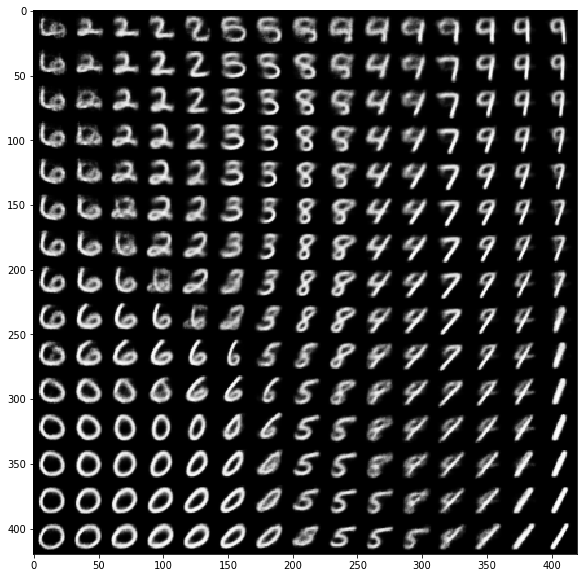

In [11]:
n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = model.decoder(z_sample).numpy()
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit
plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap="Greys_r")
plt.show()